## Generalization Error-->Genelleme Hatası

* Generalization error, modelin görmediği yeni veriler üzerinde ne kadar iyi performans gösterdiğini ölçen bir hatadır. Modelin eğitim verisine değil, gerçek dünyadaki verilere ne kadar uyum sağladığını gösterir.

### Neden Önemlidir
* Bir model eğitim verisine çok iyi uyum sağlayabilir (overfitting) ama yeni verilerde başarısız olabilir. Bu yüzden sadece eğitim hatasına değil, test hatasına da bakarız.



### Overfitting ve Underfitting

* Underfitting durumunda eğitim ve test hataları yüksektir.Model yeterince öğrenememiştir
* Overfitting durumunda eğitim hatası çok düşük test hatası ise yüksektir. Model ezberlemiştir,genelleyemiyor
* Good fit durumunda eğitim ve test hataları düşüktür.Model doğru seviyede öğrenmiştir

# Basit Bir Model ile Generalizaton Error

* Gerçek fonksyion : y=2x+1+gürültü
* Model--> Linear Regression

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
#Veri oluştur
np.random.seed(31)
X=np.random.rand(100,1) *10
y= (2*X) + 1 + np.random.rand(100,1) * 12 #gürültü eklendi
print(X[:4])
print("---")
print(y[:4])

[[2.86053822]
 [9.58105567]
 [7.70312932]
 [9.86870003]]
---
[[10.98222486]
 [31.99829438]
 [27.28866621]
 [27.33973997]]


In [28]:
#eğitim ve test setlerine ayır
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)

In [29]:
#modeli eğit
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
#tahminler
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [31]:
#hatalar
train_error=mean_squared_error(y_train,y_train_pred)
test_error=mean_squared_error(y_test,y_test_pred)

print(f"Eğitim hatasi :{train_error}")
print(f"Test(Genelleme) hatası :{test_error}")

Eğitim hatasi :13.735690431058254
Test(Genelleme) hatası :12.293685556082387


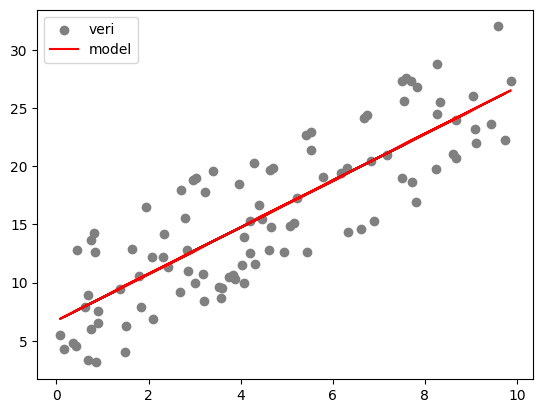

In [32]:
#Görselleştirme
plt.scatter(X,y,color="gray",label="veri")
plt.plot(X,model.predict(X),color="red",label="model")
plt.legend()

## Cross-validation (çapraz doğrulama) ile genelleme hatasını çözme

* Cross-validation, modelin genelleme performansını daha sağlıklı ölçmek için kullanılan bir yöntemdir. Tek bir train-test ayrımı yerine, veri seti birçok kez farklı şekillerde bölünerek test edilir.

* En yaygın yöntemi k-Fold Cross-Validationdır.Veri seti K parçaya bölünür.Her seferinde bir parça test seti olarak kullanılır.Geri kalanı eğitim için. Bu işlem K kez tekrarlanır.Tüm test hatalarının ortalaması alınır daha sağlam bir test hatası için

In [33]:
# Örnek (5 K ile)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model=LinearRegression()
cv_scores=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
mse_scores=-cv_scores
average_mse=mse_scores.mean()

print("Her fold için test hataları (MSE):",mse_scores)
print("Ortalama generalization hatası (MSE):",average_mse)

Her fold için test hataları (MSE): [14.99079132 11.93875437 16.09650651 14.22832369 11.58325254]
Ortalama generalization hatası (MSE): 13.76752568632735


In [34]:
#Farklı modeller ile karşılaştırma
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear": LinearRegression(),
    "Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    print(f"{name} → Ortalama MSE: {mse_scores.mean():.2f}")


Linear → Ortalama MSE: 13.77
Tree → Ortalama MSE: 27.94
Random Forest → Ortalama MSE: 20.27


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklea

## bias-variance tradeoff 

* Makine öğrenmesinde genelleme hatasını etkileyen iki ana bileşen vardır
1. Bias(yanlılık)-->Modelin gerçek ilişkiyi ne kadar iyi öğrenemediği ile ilgilidir
- Modelin aşırı basit olma durumu
- Gerçek ilişkiyi yakalayamaz
- Underfitting ile sonuçlanır
- Örnek olarak-->Gerçek ilişki bir eğri ama sen düz modellemeye çalışıyorsun

2. Variance(varyans)-->Modelin verilerdeki rastgeleliklere ne kadar duyarlu olduğu ile ilgilidir
- Modelin aşırı karmaşık olması durumudur
- Veriyi ezberler, gürültüyü de öğrenir
- Overfitting(ezberleme) ike sonuçlanır
- Örnek olarak-->Model her bir veri noktasını tam olarak öğrenmiş ama genel bir örüntü çıkaramamış


### Toplam Hata(Genelleme Hatası)

* Genelleme Hatası = Bias**2 +Variance + Irreducible Error
* Bias**2-->modelin yapısal hatası
* Variance-->eğitilen modele göre tahminlerin değişkenliği
* Irreducible Error-->ölçüm hataları,veri gürültüsü vs(azaltılamaz)


## Örnek Bias-Variance Tradeoff(denge) Simülasyonu

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

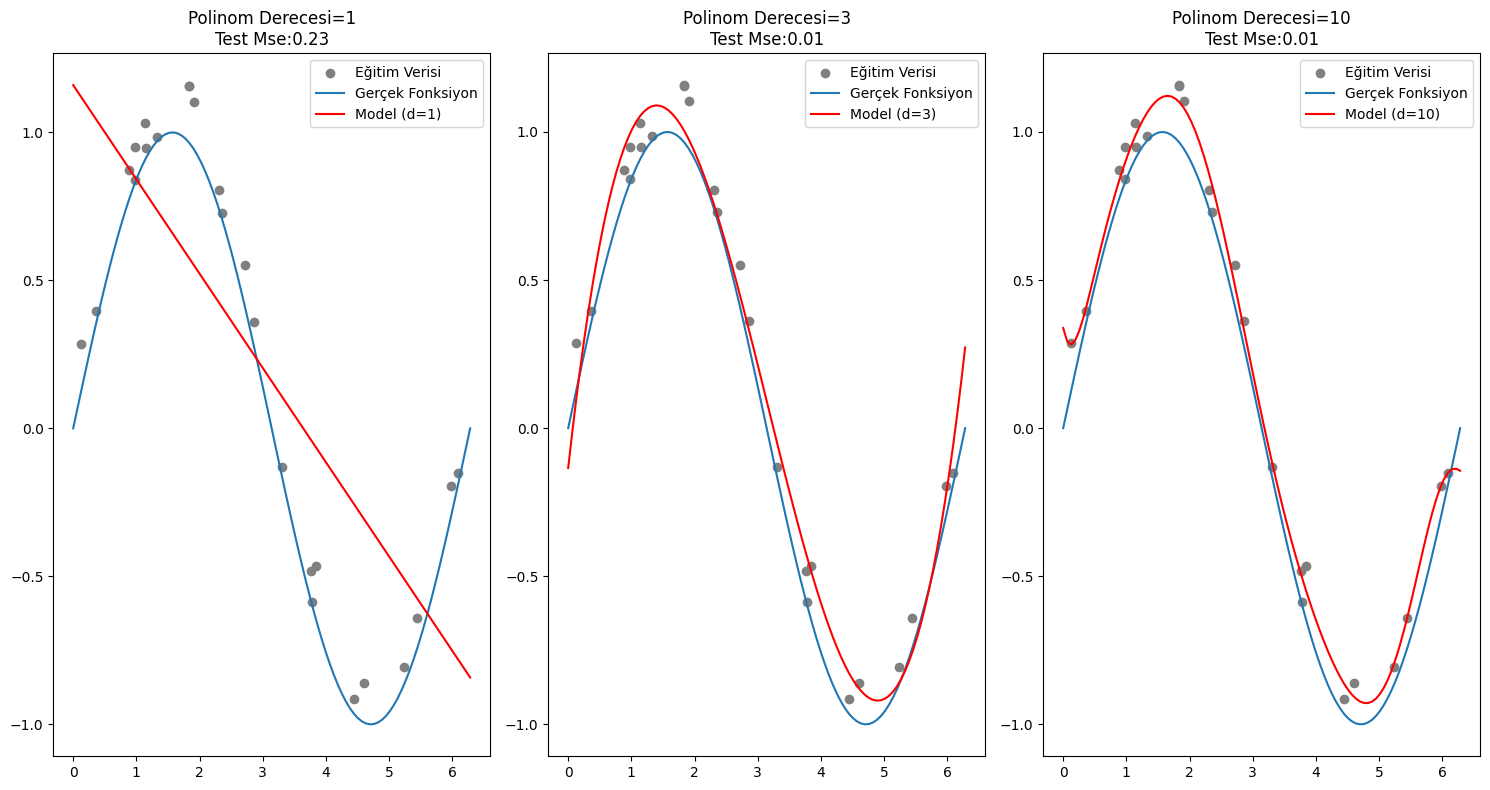

In [36]:
#Gerçek fonksiyon y=sin(x)
def true_function(x):
    return np.sin(x)
#Veriyi üret(gürültülü)
np.random.seed(42)
X=np.sort(np.random.rand(25)*2*np.pi)
y=true_function(X) + np.random.rand(25)*0.2 #gürültü ekliyoz

#Test verisi(daha düzgün)
X_test=np.linspace(0,2*np.pi,100)
y_true=true_function(X_test)

#Farklı derecelerde polinom modeller
degress=[1,3,10]

plt.figure(figsize=(15,8))
for i ,degree in enumerate(degress):
    model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(X[:,np.newaxis],y)
    y_pred=model.predict(X_test[:,np.newaxis])

    mse=mean_squared_error(y_true,y_pred)
    plt.subplot(1,3,i+1)
    plt.scatter(X,y,color="gray",label="Eğitim Verisi")
    plt.plot(X_test,y_true,label="Gerçek Fonksiyon")
    plt.plot(X_test,y_pred,color="red",label=f"Model (d={degree})")
    plt.title(f"Polinom Derecesi={degree}\nTest Mse:{mse:.2f}")
    plt.legend()


plt.tight_layout()
plt.show()

## Çıktı Yorumu
* d=1 (Düşük karmaşıklık)
- Yüksek bias 
- Model çok basit(underfittig)(öğrenmiyor)

* d=3 (Orta Seviye Karmaşıklık)
- Bias ve varyans dengede
- Good fit(ideal model) 

* d=10 (Yüksek Karmaşıklık)
- Düşük bias yüksek varyans
- Model aşırı uyum sağlamış (overfitting)

# Regularization (Düzenlileştirme) Nedir?

** Regularization bias-variance dengesini kontrol altına almayı sağlayan en yaygın yollardan biridir.Overfitting problemini çözmede yardımcı olur.Modelin karmaşıklığını cezalandırarak varyansı düşürmeyi hedefler
- Modelin çok büyük ağırlıklar öğremesini engeller
- Overfittingi azaltır
- Bias miktarını hafif arttırır ama total hata azalabilir

** Regularization anlamı kısaca " Dostum o kadar ezberleme biraz öğren a."

## Regularization Türleri

* 1-Ridge Regresyon(L2 Regularization)

** Kayıp fonksiyonuna ağırlıkların karesinin toplamı eklenir

$$Loss = MSE + \lambda \sum_{j} w_j^2$$

* Lasso Regresyon(L1 Regularization)

** Kayıp fonksiyonuna ağırlıkların mutlak değerlerinin toplamı eklenir

$$Loss = MSE + \lambda \sum_{j} |w_j|$$



### Ridge ve Lasso ile Pyton Örneği

In [37]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [38]:
#polinom veri üret(overfitting yapmak için yüksek derece)
degree=10
X=np.sort(np.random.rand(25)*2*np.pi)
y=np.sin(X)+ np.random.randn(25)* 0.2
X_test=np.linspace(0,2*np.pi,100)
y_true=np.sin(X_test)

In [41]:
#Modeller:
models={"Linear":make_pipeline(PolynomialFeatures(degree),LinearRegression()),
        "Ridge (L2)":make_pipeline(PolynomialFeatures(degree),Ridge(alpha=1.0)),
        "Lasso (L1)":make_pipeline(PolynomialFeatures(degree),Lasso(alpha=0.01,max_iter=10000))
}

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.16919e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e-01, tolerance: 1.257e-03
  model = cd_fast.enet_coordinate_descent(


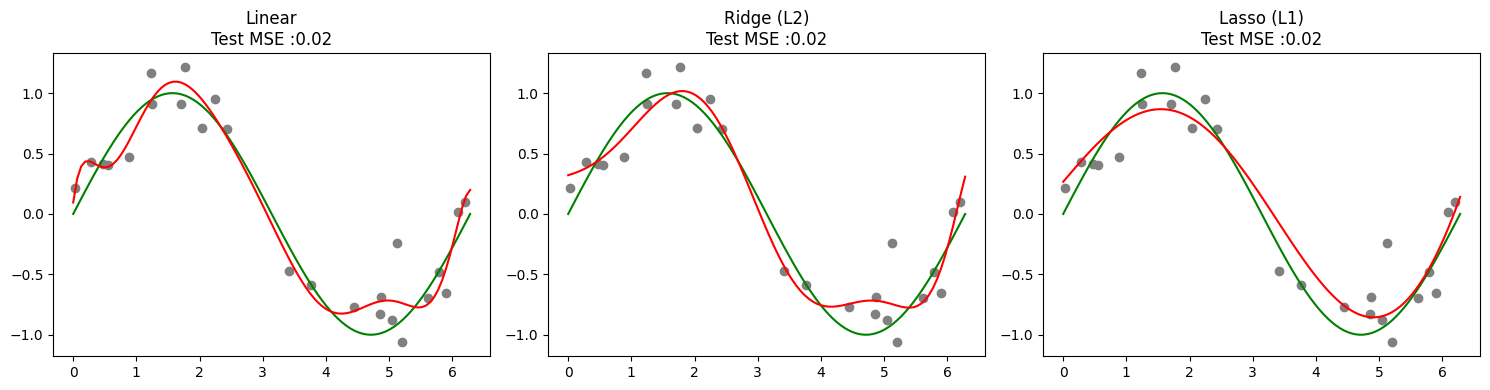

In [47]:
plt.figure(figsize=(15,4))
for i,(name,model) in enumerate(models.items()):
    model.fit(X[:,np.newaxis],y)
    y_pred=model.predict(X_test[:,np.newaxis])
    mse=mean_squared_error(y_true,y_pred)

    plt.subplot(1,3,i+1)
    plt.scatter(X,y,color="gray",label="Veri")
    plt.plot(X_test,y_true,color="green",label="Gerçek Fonksiyon")
    plt.plot(X_test,y_pred,color="red",label=name)
    plt.title(f"{name}\nTest MSE :{mse:.2f}")
plt.tight_layout()
plt.show()

## Çıktı yorumu
* LinearRegression:Yüksek varyans,overfitting
* Ridge:Daha yumuşak öğrenme,daha az varyans
* Lasso:Bazı katsayılar sıfır-->sade model +düşük varyans